**Tổng Quan**
---
---
*Đề Tài (Topic)*
  - Xây dựng mô hình dự đoán giá vàng

*Dữ liệu (Dataset)*
  - Dataset giá vàng Việt Nam được lấy từ Kaggle đây là một trong những cộng đồng, một nền tảng lớn uy tín về Dataset.
  - Dữ liệu ban đầu: 19 Cột,
  - Quá trình xử lí dữ liệu:
    + Tách Cột 'Date','Price (VND)' ra khỏi bảng dữ liệu chính sau đó chọn lọc data trong khoảng thời gian từ ngày 01-01-2002 đến ngày 08-04-2022.

*Mô hình (Model)*
  - Mô hình sử dụng thuật toán học sâu có giám sát LSTM (Long Short-Term Memory) đây là dạng đặc biệt của RNN, cũng có thể nói là một mô hình cải tiến từ RNN nhằm giải quyết các bước nhớ dài của RNN.


**IMPORT LIBRARY**
---
---


In [ ]:
#Chuẩn bị và xử lí dữ liệu
import math
import pandas as pd #đọc dữ liệu file csv
import matplotlib.pyplot as plt #vẽ biểu đồ
import matplotlib.ticker as ticker #định dạng
import numpy as np #xử lý dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt
from tensorflow.keras.models import load_model #tải mô hình
from sklearn.preprocessing import MinMaxScaler #chuẩn hoá dữ liệu 0->1
#Huấn luyện, xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import Dropout #tránh học tủ
from keras.layers import LSTM #học phụ thuộc
from keras.layers import Dense #đầu ra
#Phân tích chỉ số
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_squared_error #đo MSE và RMSE = sqrt(MSE)
from sklearn. metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo phần trăm sai số tuyệt đối trung bình

**READ DATA**
---
---

In [ ]:
#Kết nội google colab với drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Tiến hành đọc dữ liệu csv bằng thư viện pandas với lện pd.read_csv
df=pd.read_csv('/content/drive/MyDrive/Probability-Statistic/LAB3/Team5-PAPERREPORT/Data/DATA(2002-2022).csv')
df

,Date,Prices
0,2002-01-01,4170449.50
1,2002-01-02,4198629.19
2,2002-01-03,4206113.25
3,2002-01-04,4190692.00
4,2002-01-07,4203514.59
...,...,...
5284,2022-04-04,44102530.37
5285,2022-04-05,44470144.87
5286,2022-04-06,44137702.89
5287,2022-04-07,44176594.17


In [ ]:
df.info() # kiểm tra dữ liệu đã được định dạng

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5289 entries, 0 to 5288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5289 non-null   object 
 1   Prices  5289 non-null   float64
dtypes: float64(1), object(1)
memory usage: 82.8+ KB


**ĐỊNH DẠNG CẤU TRÚC DỮ LIỆU**
---
---


In [ ]:
#Định dạng lại cấu trúc của cột Date (định dạng năm-tháng-ngày)
df["Date"]=pd.to_datetime(df.Date,format="%Y/%m/%d")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5289 entries, 0 to 5288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5289 non-null   datetime64[ns]
 1   Prices  5289 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 82.8 KB


In [ ]:
df=pd.DataFrame(df,columns=['Date','Prices'])
df.index=df.Date
df.drop("Date",axis=1, inplace=True)

In [ ]:
df.head(7) # kiểm tra 7 dòng đầu tiên

,Prices
Date,
2002-01-01,4170449.50
2002-01-02,4198629.19
2002-01-03,4206113.25
2002-01-04,4190692.00
2002-01-07,4203514.59
2002-01-08,4204907.59
2002-01-09,4244045.59


**SƠ ĐỒ DỮ LIỆU SAU KHI XỬ LÍ VÀ ĐỊNH DẠNG**
---
---
* Vẽ dựa theo giá vàng trong quá khứ
---

In [ ]:

# #Kích thước biểu đồ với chiều ngang là 17 và dọc là 5
# plt.figure(figsize=(17,5))
# #Lập biểu đồ với dữ liệu là Prices đặt tên nhãn là Gold Prices và màu line là đỏ
# plot = plt.plot(df['Prices'], label='Gold Prices', color='red')
# #Đặt tên biểu đồ là Plot Gold Prices
# plt.title('Plot Gold Prices')
# #Đặt tên cột x là Days
# plt.xlabel('Days')
# #Đặt tên cột y là Price(VND)
# plt.ylabel('Prices (VND)')
# #Thêm chú thích
# plt.legend()
# #Hiển thị sơ đồ
# # plot.set_major_formatter(format)


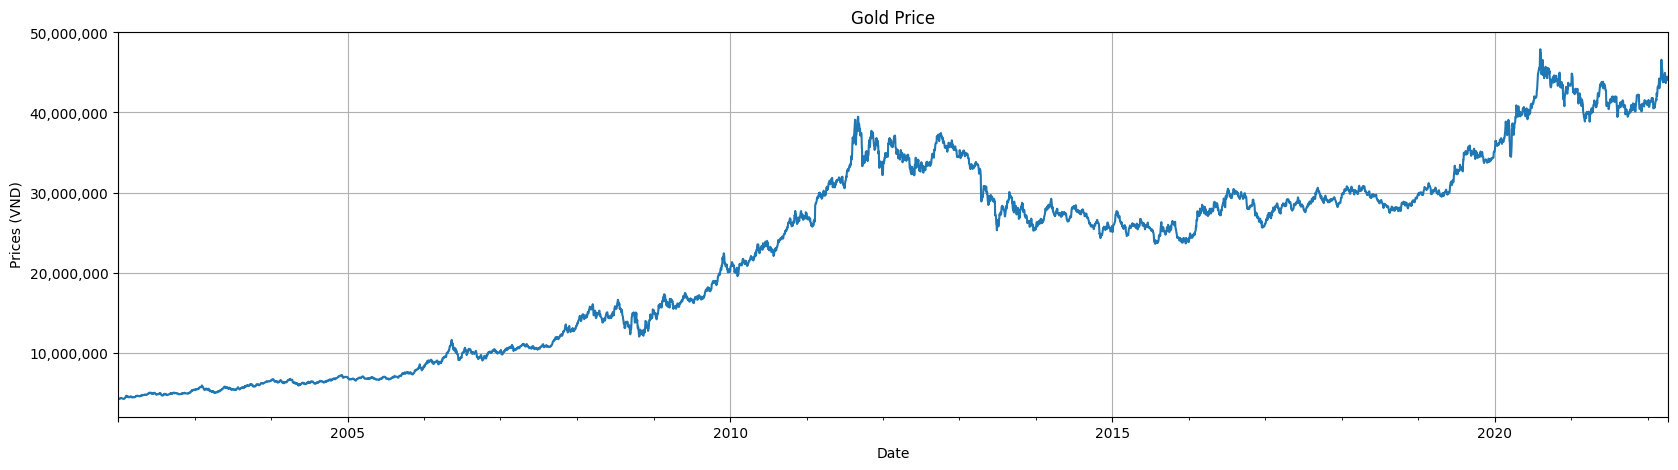

In [ ]:
#Vẽ biểu đồ
format = ticker.StrMethodFormatter('{x:,.0f}')

title = 'Gold Price'
ylabel = 'Prices (VND)'
xlabel = 'Date'

plot = df['Prices'].plot(figsize=(20, 5), title=title)
plot.autoscale(axis='x', tight=True)
plot.set(xlabel=xlabel, ylabel=ylabel)
plot.yaxis.set_major_formatter(format)
plot.grid(True)
plt.show()


**CHỌN VÙNG DỮ LIỆU TRAIN VÀ TEST**
---
---
  - Lần 1
* 80% Dữ liệu đầu tiên dùng train
* 20% dữ liệu sau đó dùng test
  - Lần 2
* 70% Dữ liệu đầu tiên dùng train
* 30% dữ liệu sau đó dùng test
  - Lần 3
* 90% Dữ liệu đầu tiên dùng train
* 10% dữ liệu sau đó dùng test

In [ ]:
df.shape #kiểm tra số dòng của dữ liệu

(5289, 1)

In [ ]:
#.values
# Return a Numpy representation of the DataFrame.
# Only the values in the DataFrame will be returned, the axes labels will be removed.
df.values

array([[ 4170449.5 ],
       [ 4198629.19],
       [ 4206113.25],
       ...,
       [44137702.89],
       [44176594.17],
       [44384284.57]])

In [ ]:
#train 8 - 2
# data=df.values
# train_data=data[:2979]
# test_data=data[2979:]
#2002-2022
#Tiến hành chia dữ liệu train / test
# data=df.values
# #Tập train sẽ lấy 80%
# train_data=data[:4231]
# #Tập test sẽ lấy 20%
# test_data=data[4231:]


In [ ]:
# divided dataste 80% train - 20% test
data=df.values
training_data_len = math.ceil(len(data)* 0.8)
train_data = data[0: training_data_len, :]
train_data.shape
test_data=data[training_data_len:]
test_data.shape

(1057, 1)

In [ ]:
#train 7 - 3
# train_data73=data[:2606]
# test_data73=data[2606:]
#2002-2022
#Tập train sẽ lấy 70%
# train_data73=data[:3702]
# #Tập test sẽ lấy 30%
# test_data73=data[3702:]

In [ ]:
# # divided dataste 70% train - 30% test
# training_data_len73 = math.ceil(len(data)* 0.7)
# train_data73 = data[0: training_data_len73, :]
# train_data73.shape
# test_data73=data[training_data_len73:]
# test_data73.shape

(1586, 1)

In [ ]:
#train 9 - 1
# train_data91=data[:3351]
# test_data91=data[3351:]
#2002-2022
#Tập train sẽ lấy 90%
# train_data91=data[:4760]
# #Tập test sẽ lấy 10%
# test_data91=data[4760:]

In [ ]:
# # divided dataste 90% train - 10% test
# training_data_len91 = math.ceil(len(data)* 0.9)
# train_data91 = data[0: training_data_len91, :]
# train_data91.shape
# test_data91=data[training_data_len91:]
# test_data91.shape

(528, 1)

**CHUẨN HOÁ DỮ LIỆU**
---
---

In [ ]:
#Tiến hành chuẩn hoá lại dữ liệu với các giá trị được đưa về từ 0-1
sc=MinMaxScaler(feature_range=(0,1))
#Chuẩn hoá dữ liệu có tên data
sc_train=sc.fit_transform(data)

In [ ]:
#Kiểm tra dữ liệu sau khi chuẩn hoá
sc_train

array([[0.00000000e+00],
       [6.44347526e-04],
       [8.15475581e-04],
       ...,
       [9.13878074e-01],
       [9.14767349e-01],
       [9.19516330e-01]])

**XỬ LÍ DỮ LIỆU TẬP TRAIN**
---
---

In [ ]:
# 8-2
#Tiến hành kahi báo 2 mảng dử liệu x_train và y_train
x_train,y_train=[],[]
for i in range(15,len(train_data)): #tạo vòng lặp
  x_train.append(sc_train[i-15:i,0]) #.append gán phần tử vào cuối mảng, bởi vì số ngày sẽ học để dự đoán 1 ngày tiếp theo là 60 nên -60 (mỗi mảng gồm giá 60 ngày)
  y_train.append(sc_train[i,0])

In [ ]:
  x_train.shape

(4217, 15, 1)

In [ ]:
 y_train.shape

(4217, 1)

In [ ]:
x_train=np.array(x_train) # sắp xếp dữ liệu thành một mảng
y_train=np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1)) # xử lí dữ liệu thành mảng một chiều
y_train=np.reshape(y_train,(y_train.shape[0],1))

In [ ]:
x_train

array([[[0.00000000e+00],
        [6.44347526e-04],
        [8.15475581e-04],
        ...,
        [3.08138928e-03],
        [2.45963647e-03],
        [2.18099288e-03]],

       [[6.44347526e-04],
        [8.15475581e-04],
        [4.62858349e-04],
        ...,
        [2.45963647e-03],
        [2.18099288e-03],
        [2.08171357e-03]],

       [[8.15475581e-04],
        [4.62858349e-04],
        [7.56055476e-04],
        ...,
        [2.18099288e-03],
        [2.08171357e-03],
        [1.63266037e-03]],

       ...,

       [[5.98105158e-01],
        [5.94302251e-01],
        [5.90388420e-01],
        ...,
        [5.93641919e-01],
        [5.91173433e-01],
        [5.86580348e-01]],

       [[5.94302251e-01],
        [5.90388420e-01],
        [5.84938553e-01],
        ...,
        [5.91173433e-01],
        [5.86580348e-01],
        [5.87852605e-01]],

       [[5.90388420e-01],
        [5.84938553e-01],
        [5.92824911e-01],
        ...,
        [5.86580348e-01],
        [5.8785

In [ ]:
y_train

array([[0.00208171],
       [0.00163266],
       [0.0011195 ],
       ...,
       [0.5878526 ],
       [0.58734867],
       [0.59272329]])

In [ ]:
# # 7-3
# x_train73,y_train73=[],[]
# for i in range(15,len(train_data73)):
#   x_train73.append(sc_train[i-15:i,0])
#   y_train73.append(sc_train[i,0])

In [ ]:
# x_train73=np.array(x_train73)
# y_train73=np.array(y_train73)

# x_train73=np.reshape(x_train73,(x_train73.shape[0], x_train73.shape[1],1))
# y_train73=np.reshape(y_train73,(y_train73.shape[0],1))

In [ ]:
# # 9-1
# x_train91,y_train91=[],[]
# for i in range(15,len(train_data91)):
#   x_train91.append(sc_train[i-15:i,0])
#   y_train91.append(sc_train[i,0])

In [ ]:
# x_train91=np.array(x_train91)
# y_train91=np.array(y_train91)

# x_train91=np.reshape(x_train91,(x_train91.shape[0], x_train91.shape[1],1))
# y_train91=np.reshape(y_train91,(y_train91.shape[0],1))

**HUẤN LUYỆN MÔ HÌNH**
---
---


In [ ]:
# 8-2
#Xây dựng mô hình
model=Sequential() #đầu vào, tạo list lưu trữ các danh sách (list)
model.add(LSTM(units=64, input_shape=(x_train.shape[1],1) ,return_sequences=True)) # tạo lớp LSTM - mô tả thông tin đầu vào
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=32))
model.add(Dropout(0.5))
model.add(Dense(25))
# model.add(Dropout(0.2))
model.add(Dropout(0.5)) #Tránh việc học thuộc (dùng để giả định một phần các unit bị ẩn đi trong quá trình training, qua đó làm giảm tích hòa trộn)
model.add(Dense(1)) #Đầu ra một chiều dùng để dự báo cho một giá trị (chiều đầu ra)
model.compile(loss='mean_absolute_error', optimizer='adam') #mean_absolute_error: dụng để đánh giá sự sai khác giữa mô hình dự đoán và tập dữ liệu testing, adam: dùng để tối ưu tốc độ học
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 15, 64)            16896     
                                                                 
 dropout_4 (Dropout)         (None, 15, 64)            0         
                                                                 
 lstm_4 (LSTM)               (None, 15, 64)            33024     
                                                                 
 dropout_5 (Dropout)         (None, 15, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 25)               

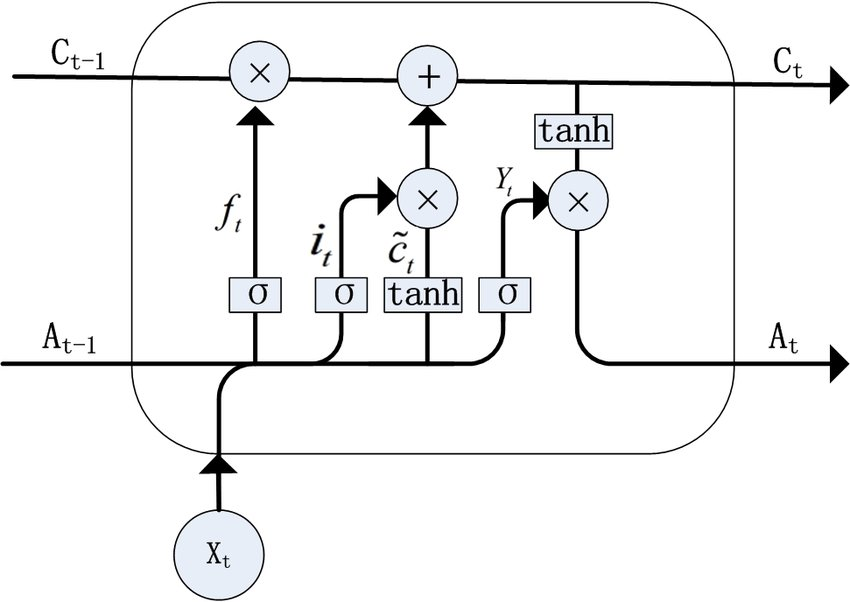

In [ ]:

#huấn luyện mô hình mô hình
save_model="save_model.h5" #lưu lại mô hình với dạng file .h5
best_model=ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True, mode='auto') #tìm ra mô hình tốt nhất, save_best_only: lưu mô hình tốt nhất
model.fit(x_train,y_train, epochs=10,verbose=2,callbacks=best_model) #lưu dữ liệu phần epochs
# model.fit(x_train, y_train, batch_size= 32, epochs=30)

Epoch 1/10

Epoch 1: loss improved from inf to 0.10225, saving model to save_model.h5
132/132 - 9s - loss: 0.1022 - 9s/epoch - 70ms/step
Epoch 2/10

Epoch 2: loss improved from 0.10225 to 0.07366, saving model to save_model.h5
132/132 - 3s - loss: 0.0737 - 3s/epoch - 19ms/step
Epoch 3/10

Epoch 3: loss improved from 0.07366 to 0.07008, saving model to save_model.h5
132/132 - 3s - loss: 0.0701 - 3s/epoch - 24ms/step
Epoch 4/10

Epoch 4: loss improved from 0.07008 to 0.06514, saving model to save_model.h5
132/132 - 3s - loss: 0.0651 - 3s/epoch - 26ms/step
Epoch 5/10

Epoch 5: loss improved from 0.06514 to 0.06079, saving model to save_model.h5
132/132 - 3s - loss: 0.0608 - 3s/epoch - 19ms/step
Epoch 6/10

Epoch 6: loss did not improve from 0.06079
132/132 - 3s - loss: 0.0609 - 3s/epoch - 19ms/step
Epoch 7/10

Epoch 7: loss improved from 0.06079 to 0.05937, saving model to save_model.h5
132/132 - 3s - loss: 0.0594 - 3s/epoch - 19ms/step
Epoch 8/10

Epoch 8: loss improved from 0.05937 to 0

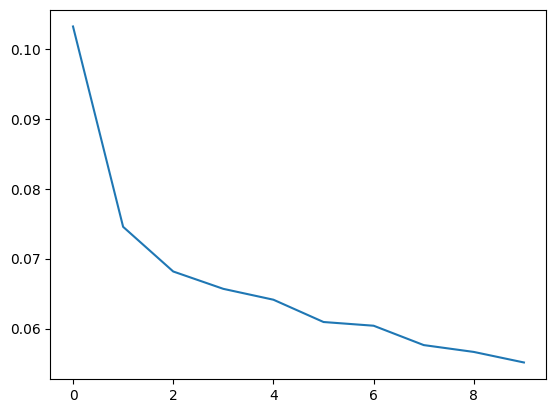

In [ ]:
loss_per_epoch = model.history.history['loss']
# plt.plot(loss_per_epoch)

In [ ]:
# # 7-3
# #Xây dựng mô hình
# model73=Sequential()
# #128
# model73.add(LSTM(units=64, input_shape=(x_train73.shape[1],1),return_sequences=True))
# model73.add(Dropout(0.5))
# model73.add(LSTM(units=64, return_sequences=True))
# model73.add(Dropout(0.5))
# model73.add(LSTM(units=32))
# model73.add(Dropout(0.5))
# model73.add(Dense(25))
# model73.add(Dropout(0.5))
# # Tránh việc học thuộc
# model73.add(Dense(1))
# model73.compile(loss='mean_absolute_error', optimizer='adam')

In [ ]:
# #thực thi mô hình
# save_model73="save_model73.h5"
# best_model73=ModelCheckpoint(save_model73,monitor='loss',verbose=2,save_best_only=True, mode='auto')
# model73.fit(x_train73,y_train73, epochs=10,verbose=2,callbacks=best_model73) # callbacks lưu dữ liệu phần epochs có loss thấp nhất
# # model.fit(x_train, y_train, batch_size= 32, epochs=30)

In [ ]:
# loss_per_epoch = model73.history.history['loss']
# plt.plot(loss_per_epoch)

In [ ]:
# # 9-1
# #Xây dựng mô hình
# model91=Sequential()
# #unit Số nguyên dương, chiều của không gian đầu ra.
# model91.add(LSTM(units=64, input_shape=(x_train91.shape[1],1),return_sequences=True))
# model91.add(Dropout(0.5))
# model91.add(LSTM(units=64, return_sequences=True))
# model91.add(Dropout(0.5))
# model91.add(LSTM(units=32))
# model91.add(Dropout(0.5))
# model91.add(Dense(25))
# model91.add(Dropout(0.5))
# model91.add(Dense(1))
# model91.compile(loss='mean_absolute_error', optimizer='adam')

In [ ]:
# #thực thi mô hình
# save_model91="save_model91.h5"
# best_model91=ModelCheckpoint(save_model91,monitor='loss',verbose=2,save_best_only=True, mode='auto')
# model91.fit(x_train91,y_train91, epochs=10,verbose=2,callbacks=best_model91) #lưu dữ liệu phần epochs có loss thấp nhất
# # model.fit(x_train, y_train, batch_size= 32, epochs=30)

In [ ]:
# loss_per_epoch = model91.history.history['loss']
# plt.plot(loss_per_epoch)

**ĐIỀU CHỈNH ĐỊNH DẠNG DỮ LIỆU TỪ DỮ LIỆU ĐÃ CHUẨN HOÁ SANG (0->1) SANG VND**
---


In [ ]:
# 8-2
y_train=sc.inverse_transform(y_train) #tiến hành xử lí số chuẩn hoá 0-1 thành giá vàng VND
final_model=load_model('save_model.h5') #load lại mô hình tốt nhất đã lưu
y_train_predict=final_model.predict(x_train) #giá dự đoán
# y_train_predict=sc.inverse_transform(y_train_predict) #tiến hành xử lí số chuẩn hoá 0-1 thành giá vàng VND

132/132 [==============================] - 2s 6ms/step


In [ ]:
y_train

array([[ 4261490.5       ],
       [ 4241851.75      ],
       [ 4219409.26      ],
       ...,
       [29879408.57999999],
       [29857369.5       ],
       [30092421.56      ]])

In [ ]:
# # 7-3
# y_train73=sc.inverse_transform(y_train73)
# final_model73=load_model('save_model73.h5')
# y_train_predict73=final_model73.predict(x_train73)
# y_train_predict73=sc.inverse_transform(y_train_predict73)

In [ ]:
# # 9-1
# y_train91=sc.inverse_transform(y_train91)
# final_model91=load_model('save_model91.h5')
# y_train_predict91=final_model91.predict(x_train91)
# y_train_predict91=sc.inverse_transform(y_train_predict91)

**XỬ LÍ DỮ LIỆU TẬP TEST**
---
---

In [ ]:
# 8-2
test=df[len(train_data)-15:].values #trừ đi 60 ngày đầu tiên dùng để dự đoán ngày tiếp theo
test=test.reshape(-1,1)
sc_test=sc.transform(test)

x_test=[]
for i in range(15,test.shape[0]):
  x_test.append(sc_test[i-15:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# y_test=data[2979:]
#2002-2022
# y_test=data[4231:]
y_test=data[training_data_len:]
y_test_predict=final_model.predict(x_test)
y_test_predict=sc.inverse_transform(y_test_predict)

34/34 [==============================] - 0s 6ms/step


In [ ]:
y_test_predict

array([[0.5651967 ],
       [0.56511945],
       [0.56550103],
       ...,
       [0.8723525 ],
       [0.8723093 ],
       [0.8720496 ]], dtype=float32)

In [ ]:
# # 7-3
# test73=df[len(train_data73)-15:].values
# test73=test73.reshape(-1,1)
# sc_test73=sc.transform(test73)

# x_test73=[]
# for i in range(15,test73.shape[0]):
#   x_test73.append(sc_test73[i-15:i,0])
# x_test73=np.array(x_test73)
# x_test73=np.reshape(x_test73,(x_test73.shape[0],x_test73.shape[1],1))

# # y_test73=data[2606:]
# #2002-2022
# # y_test73=data[3702:]
# y_test73=data[training_data_len73:]
# y_test_predict73=final_model73.predict(x_test73)
# y_test_predict73=sc.inverse_transform(y_test_predict73)

In [ ]:
# # 9-1
# test91=df[len(train_data91)-15:].values
# test91=test91.reshape(-1,1)
# sc_test91=sc.transform(test91)

# x_test91=[]
# for i in range(15,test91.shape[0]):
#   x_test91.append(sc_test91[i-15:i,0])
# x_test91=np.array(x_test91)
# x_test91=np.reshape(x_test91,(x_test91.shape[0],x_test91.shape[1],1))

# # y_test91=data[3351:]
# #2002-2022
# # y_test91=data[4760:]
# y_test91=data[training_data_len91:]
# y_test_predict91=final_model91.predict(x_test91)
# y_test_predict91=sc.inverse_transform(y_test_predict91)

**VẼ BIỂU ĐỒ VỚI GIÁ TRỊ DỰ ĐOÁN SAU KHI TRAIN**
---
---
* Dữ liệu train
* Dữ liệu test
* Dữ liệu dự đoán
---

<ipython-input-52-a133aacf949d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_datal['prediction']=y_train_predict
<ipython-input-52-a133aacf949d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_datal['prediction']=y_test_predict


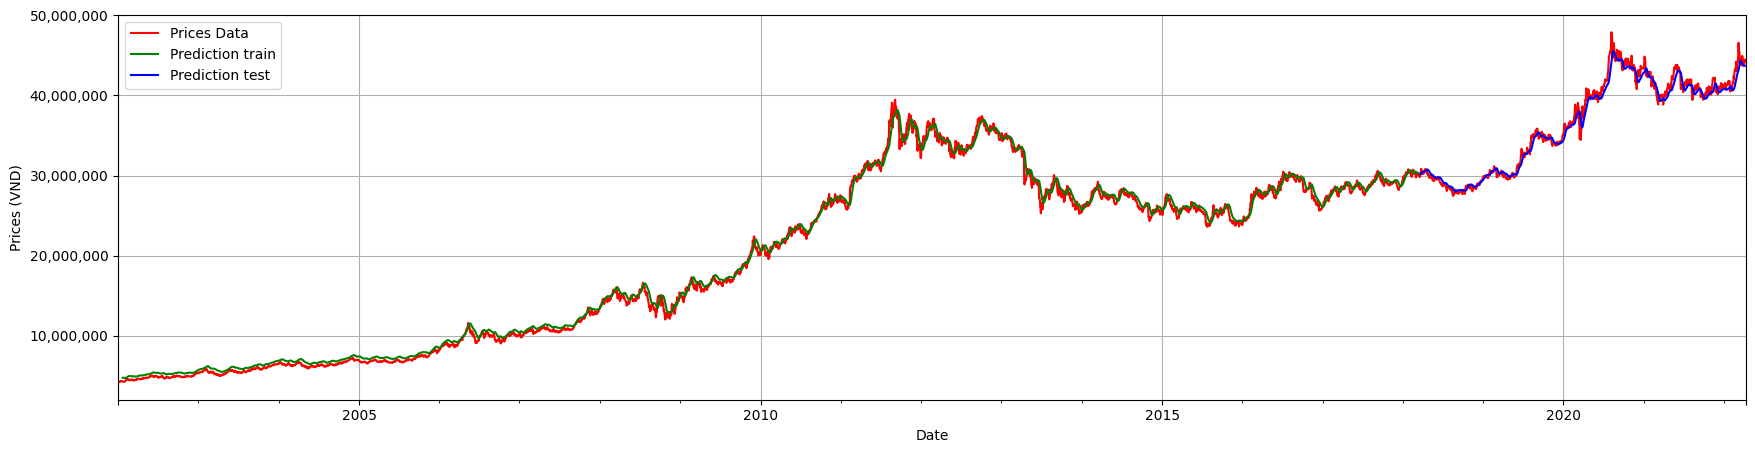

In [ ]:
#8-2
# train_datal=df[60:2979]
# test_datal=df[2979:]
#2002-2022
train_datal=df[15:training_data_len]
test_datal=df[training_data_len:]

# train_datal=df[30:4231] #vẽ đường predict với dữ liệu train
# test_datal=df[4231:] #vẽ đường  predict với dữ liệu test
format = ticker.StrMethodFormatter('{x:,.0f}')
title = 'Gold Price'
ylabel = 'Prices (VND)'
xlabel = 'Date'
plt.figure(figsize=(21,5))
plot = df['Prices'].plot(label=f"Prices Data",color='red')
train_datal['prediction']=y_train_predict
plot_pdtrain = train_datal['prediction'].plot(label=f"Prediction train", color='green')
test_datal['prediction']=y_test_predict
plot_pdtest = test_datal['prediction'].plot(label=f"Prediction test", color='blue')

plot.autoscale(axis='x', tight=True)
plot.set(xlabel=xlabel, ylabel=ylabel)
plot.yaxis.set_major_formatter(format)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#7-3
# train_datal73=df[60:2606]
# test_datal73=df[2606:]
#2002-2022
# train_datal73=df[30:3702]
# test_datal73=df[3702:]

# plt.figure(figsize=(17,5))
# plt.plot(df,label='Prices Data',color='red')
# train_datal73['prediction']=y_train_predict73
# plt.plot(train_datal73['prediction'],label='Prediction train', color='green')
# test_datal73['prediction']=y_test_predict73
# plt.plot(test_datal73['prediction'],label='Prediction test', color='blue')

# plt.title('Plot Gold Prices')
# plt.xlabel('Year')
# plt.ylabel('Prices (VND)')
# plt.legend()
# plt.show()

In [ ]:
# # train_datal73=df[30:3702]
# # test_datal73=df[3702:]
# train_datal73=df[15:training_data_len73]
# test_datal73=df[training_data_len73:]


# format = ticker.StrMethodFormatter('{x:,.0f}')
# title = 'Gold Prices Train 7 - Test 3'
# ylabel = 'Prices (VND)'
# xlabel = 'Date'
# plt.figure(figsize=(21,5))
# plot = df['Prices'].plot(label=f"Prices Data",color='red')
# train_datal73['prediction']=y_train_predict73
# plot_pdtrain = train_datal73['prediction'].plot(label=f"Prediction train", color='green')
# test_datal73['prediction']=y_test_predict73
# plot_pdtest = test_datal73['prediction'].plot(label=f"Prediction test", color='blue')

# plot.autoscale(axis='x', tight=True)
# plot.set(xlabel=xlabel, ylabel=ylabel)
# plot.yaxis.set_major_formatter(format)
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
#9-1
# train_datal91=df[60:3351]
# test_datal91=df[3351:]
#2002-2022
# train_datal91=df[30:4760]
# test_datal91=df[4760:]

# plt.figure(figsize=(17,5))
# plt.plot(df,label='Prices Data',color='red')
# train_datal91['prediction']=y_train_predict91
# plt.plot(train_datal91['prediction'],label='Prediction train', color='green')
# test_datal91['prediction']=y_test_predict91
# plt.plot(test_datal91['prediction'],label='Prediction test', color='blue')

# plt.title('Plot Gold Prices')
# plt.xlabel('Year')
# plt.ylabel('Prices (VND)')
# plt.legend()
# plt.show()

In [ ]:
# # train_datal91=df[30:4760]
# # test_datal91=df[4760:]
# train_datal91=df[15:training_data_len91]
# test_datal91=df[training_data_len91:]

# format = ticker.StrMethodFormatter('{x:,.0f}')
# title = 'Gold Prices'
# ylabel = 'Prices (VND)'
# xlabel = 'Date'
# plt.figure(figsize=(21,5))
# plot = df['Prices'].plot(label=f"Prices Data",color='red')
# train_datal91['prediction']=y_train_predict91
# plot_pdtrain = train_datal91['prediction'].plot(label=f"Prediction train", color='green')
# test_datal91['prediction']=y_test_predict91
# plot_pdtest = test_datal91['prediction'].plot(label=f"Prediction test", color='blue')

# plot.autoscale(axis='x', tight=True)
# plot.set(xlabel=xlabel, ylabel=ylabel)
# plot.yaxis.set_major_formatter(format)
# plt.legend()
# plt.grid(True)
# plt.show()

**PHÂN TÍCH DỮ LIỆU SAU KHI TRAIN MODEL VỚI TRAIN DATA**
---
---
* Dữ liệu phần train và giá dự đoán phần train
---

In [ ]:
train_datal

,Prices,prediction
Date,,
2002-01-22,4261490.50,4726509.5
2002-01-23,4241851.75,4729910.0
2002-01-24,4219409.26,4730052.0
2002-01-25,4218340.50,4727150.0
2002-01-28,4219850.24,4722112.5
...,...,...
2018-03-15,30024640.63,30256340.0
2018-03-16,29823768.12,30251942.0
2018-03-19,29879408.58,30239324.0


In [ ]:
#8-2 train data
print('R_square train: ', r2_score(train_datal['Prices'],train_datal['prediction'])) #R-squared (R2)
print('MAE: ',mean_absolute_error(train_datal['Prices'],train_datal['prediction'])) #Mean Absolute Error (MAE) đo độ lớn trung bình của các lỗi trong một tập hợp các dự đoán
mape =  mean_absolute_percentage_error(train_datal['Prices'],train_datal['prediction']) #MAPE (Mean absolute percentage error) là phần trăm sai số trung bình tuyệt đối
print(f"MAPE: {mape * 100:.2f}%")
print('MSE: ',mean_squared_error(train_datal['Prices'],train_datal['prediction']))
print('RMSE: ',np.sqrt(mean_squared_error(train_datal['Prices'],train_datal['prediction'])))

R_square train:  0.9966837830935592
MAE:  471148.47596632666
MAPE: 3.55%
MSE:  357930195028.8218
RMSE:  598272.6761509519


In [ ]:
# train_datal73

NameError: ignored

In [ ]:
# #7-3 train data
# print('R_square train: ', r2_score(train_datal73['Prices'],train_datal73['prediction']))
# print('MAE: ',mean_absolute_error(train_datal73['Prices'],train_datal73['prediction']))
# mape73 = mean_absolute_percentage_error(train_datal73['Prices'],train_datal73['prediction'])
# print(f"MAPE: {mape73 * 100:.2f}%")
# print('MSE: ',mean_squared_error(train_datal73['Prices'],train_datal73['prediction']))
# print('RMSE: ',np.sqrt(mean_squared_error(train_datal73['Prices'],train_datal73['prediction'])))



In [ ]:
# train_datal91

In [ ]:
# #9-1 train data
# # print('R_square train: ', r2_score(train_datal91['Prices'],train_datal91['prediction']))
# # print('MAE: ',mean_absolute_error(train_datal91['Prices'],train_datal91['prediction']))
# mape91 = mean_absolute_percentage_error(train_datal91['Prices'],train_datal91['prediction'])
# print(f"MAPE: {mape91 * 100:.2f}%")
# # print('MSE: ',mean_squared_error(train_datal91['Prices'],train_datal91['prediction']))
# print('RMSE: ',np.sqrt(mean_squared_error(train_datal91['Prices'],train_datal91['prediction'])))

**PHÂN TÍCH DỮ LIỆU SAU KHI TRAIN MODEL VỚI TEST DATA**
---
---
* Dữ liệu phần test và giá dự đoán phần test
---

In [ ]:
test_datal

NameError: ignored

In [ ]:
#8-2 test data
# print('R_square train: ', r2_score(test_datal['Prices'],test_datal['prediction']))
# print('MAE: ',mean_absolute_error(test_datal['Prices'],test_datal['prediction']))
mape_t82 = mean_absolute_percentage_error(test_datal['Prices'],test_datal['prediction'])
print(f"MAPE: {mape_t82 * 100:.2f}%")
# print('MSE: ',mean_squared_error(test_datal['Prices'],test_datal['prediction']))
print('RMSE: ',np.sqrt(mean_squared_error(test_datal['Prices'],test_datal['prediction'])))

NameError: ignored

In [ ]:
# test_datal73

In [ ]:
# #7-3 test data
# # print('R_square train: ', r2_score(test_datal73['Prices'],test_datal73['prediction']))
# # print('MAE: ',mean_absolute_error(test_datal73['Prices'],test_datal73['prediction']))
# mape_t73 = mean_absolute_percentage_error(test_datal73['Prices'],test_datal73['prediction'])
# print(f"MAPE: {mape_t73 * 100:.2f}%")
# # print('MSE: ',mean_squared_error(test_datal73['Prices'],test_datal73['prediction']))
# print('RMSE: ',np.sqrt(mean_squared_error(test_datal73['Prices'],test_datal73['prediction'])))

In [ ]:
# test_datal91

In [ ]:
# #9-1 test data
# # print('R_square train: ', r2_score(test_datal91['Prices'],test_datal91['prediction']))
# # print('MAE: ',mean_absolute_error(test_datal91['Prices'],test_datal91['prediction']))
# mape91 = mean_absolute_percentage_error(test_datal91['Prices'],test_datal91['prediction'])
# print(f"MAPE: {mape91 * 100:.2f}%")
# # print('MSE: ',mean_squared_error(test_datal91['Prices'],test_datal91['prediction']))
# print('RMSE: ',np.sqrt(mean_squared_error(test_datal91['Prices'],test_datal91['prediction'])))

**PRIDICTION GOLD PRICES NEXT 30 DAYS**
---

---


In [ ]:
sc=MinMaxScaler(feature_range=(0,1))
sc_test=sc.fit_transform(test_data)

In [ ]:
sc_test

array([[0.13925184],
       [0.15922519],
       [0.16622012],
       ...,
       [0.81586292],
       [0.81776428],
       [0.82791807]])

In [ ]:
x_input=sc_test[(len(test_data)-15):].reshape(1,-1)
x_input.shape

(1, 15)

In [ ]:
x_input

array([[0.82086813, 0.79967346, 0.81831288, 0.85543213, 0.841921  ,
        0.82381383, 0.79333594, 0.81895965, 0.82671492, 0.81233614,
        0.81414337, 0.83211569, 0.81586292, 0.81776428, 0.82791807]])

In [ ]:
x_input=sc_test[1042:].reshape(1,-1)
x_input.shape

(1, 15)

In [ ]:
x_input

array([[0.80205334, 0.81189703, 0.81241817, 0.83018498, 0.87096104,
        0.93561628, 0.8786266 , 0.88746792, 0.87115616, 0.84568735,
        0.79905366, 0.79812934, 0.83766334, 0.82194302, 0.82086813,
        0.79967346, 0.81831288, 0.85543213, 0.841921  , 0.82381383,
        0.79333594, 0.81895965, 0.82671492, 0.81233614, 0.81414337,
        0.83211569, 0.81586292, 0.81776428, 0.82791807]])

In [ ]:
x_input.shape

(1, 15)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8208681280523751,
 0.799673455080389,
 0.8183128761723071,
 0.8554321347695499,
 0.8419210018018684,
 0.8238138331846911,
 0.7933359387310219,
 0.8189596477882588,
 0.8267149192507321,
 0.8123361423201174,
 0.8141433743714519,
 0.8321156923646174,
 0.8158629249170943,
 0.8177642820488755,
 0.827918065191074]

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=15
i=0
while(i<30):
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i+1,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=1)
        print("{} day output {}".format(i+1,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        print('hello');
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=2)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
# print(lst_output)

1/1 - 0s - 25ms/epoch - 25ms/step
[0.70039076]
16
2 day input [0.79967346 0.81831288 0.85543213 0.841921   0.82381383 0.79333594
 0.81895965 0.82671492 0.81233614 0.81414337 0.83211569 0.81586292
 0.81776428 0.82791807 0.70039076]
1/1 [==============================] - 0s 20ms/step
2 day output [[0.69755924]]
3 day input [0.81831288 0.85543213 0.841921   0.82381383 0.79333594 0.81895965
 0.82671492 0.81233614 0.81414337 0.83211569 0.81586292 0.81776428
 0.82791807 0.70039076 0.69755924]
1/1 [==============================] - 0s 25ms/step
3 day output [[0.6913141]]
4 day input [0.85543213 0.841921   0.82381383 0.79333594 0.81895965 0.82671492
 0.81233614 0.81414337 0.83211569 0.81586292 0.81776428 0.82791807
 0.70039076 0.69755924 0.6913141 ]
1/1 [==============================] - 0s 25ms/step
4 day output [[0.6819135]]
5 day input [0.841921   0.82381383 0.79333594 0.81895965 0.82671492 0.81233614
 0.81414337 0.83211569 0.81586292 0.81776428 0.82791807 0.70039076
 0.69755924 0.6913141  

In [ ]:
day_new=np.arange(1,31)
day_pred=np.arange(31,61)

In [ ]:
lst_output=sc.inverse_transform(lst_output)

In [ ]:
plt.plot(day_new,test_data[(len(test_data)-30):])
plt.plot(day_pred,lst_output)

In [ ]:
df_new=data.tolist()
df_new.extend(lst_output)
plt.figure(figsize=(14,5))
plt.plot(df_new)

*Prices 30 days next*
---


In [ ]:
# lst_output #pridictions gofld prices

In [ ]:
print("Nhập ngày thứ x ban muốn xem kết quả:")
x=int(input())
print("Bạn nhập ngày thứ:",x)
if x <=0 or x >30:
  print("Không có kết quả")
else:
  result = lst_output[x-1]
  print("Kết quả là: ",result)